In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_collections =     {
            "leastcloudy": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/leastcloudy/0531",
                },
            "diffcr": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/diffcr/init_0529_pretrain",
                },
            "ctgan": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/ctgan/init_0529_repro",
                    "allclear_rgb": "/share/hariharan/cloud_removal/results/baselines/ctgan/init_0529_allclear_ep41",
                },
            "pmaa": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/pmaa/init_0529_pretrain_new",
                    "allclear_rgb": "/share/hariharan/cloud_removal/results/baselines/pmaa/init_0529_allclear_epoch25",
                },
            "uncrtaints": 
                {
                    "with_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_pretrained_no_s1",
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_pretrained_no_s1",
                    "allclear_with_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_0529_allclear_EP20",
                },
            "utilise": 
                {
                    "with_s1": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_pretrain_w_s1/",
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_pretrain_wo_s1",
                    "allclear_rgb": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_allclear_band4_EP400",
                },
        }

path_collections =     {
            "leastcloudy": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/leastcloudy/0531",
                },
            "diffcr": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/diffcr/init_0529_pretrain",
                },
            "ctgan": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/ctgan/init_0529_repro",
                    "allclear": "/share/hariharan/cloud_removal/results/baselines/ctgan/init_0529_allclear_ep41",
                },
            "pmaa": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/pmaa/init_0529_pretrain_new",
                    "allclear": "/share/hariharan/cloud_removal/results/baselines/pmaa/init_0529_allclear_epoch25",
                },
            "uncrtaints": 
                {
                    "with_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_pretrained_no_s1",
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_pretrained_no_s1",
                    "allclear": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_0529_allclear_EP20",
                },
            "utilise": 
                {
                    "with_s1": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_pretrain_w_s1/",
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_pretrain_wo_s1",
                    "allclear": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_allclear_band4_EP400",
                },
        }

df = pd.DataFrame.from_dict(path_collections, orient="index")
df = df.reset_index().melt(id_vars=['index'], var_name='type', value_name='path').dropna(subset=['path'], inplace=False)
df = df.reset_index()
del df["level_0"]

In [3]:
import os
import pandas as pd

# Initialize the metrics columns
for i in range(9):
    df[f"MAE-{i}"] = 0.0
    df[f"PSNR-{i}"] = 0.0
    df[f"SAM-{i}"] = 0.0
    df[f"SSIM-{i}"] = 0.0

# Iterate over the rows and update metrics
for row_id, row in df.iterrows():
    fpath = os.path.join(row["path"], row["index"] + "_lulc_metrics.csv")
    temp_df = pd.read_csv(fpath)
    for metric_name in ["MAE", "PSNR", "SAM", "SSIM"]:
        for j in range(9):
            # Use .at to avoid the SettingWithCopyWarning
            df.at[row_id, f"{metric_name}-{j}"] = temp_df[temp_df["Unnamed: 0"] == metric_name].values[0][j+1]

In [4]:
df = df[~((df["index"]=="uncrtaints")&(df["type"]=="wo_s1"))] 
df = df[~((df["index"]=="utilise")&(df["type"]=="wo_s1"))] 
df = df[~((df["index"]=="leastcloudy"))] 
df = df[~((df["index"]=="diffcr"))] 
df = df.reset_index()

In [5]:
df

,level_0,index,type,path,MAE-0,PSNR-0,SAM-0,SSIM-0,MAE-1,PSNR-1,...,SAM-6,SSIM-6,MAE-7,PSNR-7,SAM-7,SSIM-7,MAE-8,PSNR-8,SAM-8,SSIM-8
0,2,ctgan,wo_s1,/share/hariharan/cloud_removal/results/baselin...,0.046298,25.633545,11.488591,0.785221,0.033751,28.656784,...,11.926803,0.753236,0.101239,20.578455,10.898939,0.672564,0.186000,17.799870,14.009816,0.557817
1,3,pmaa,wo_s1,/share/hariharan/cloud_removal/results/baselin...,0.051682,24.974028,10.473769,0.726871,0.039739,27.107374,...,10.069163,0.788507,0.076548,23.787888,9.194777,0.793306,0.192427,17.528839,15.227772,0.542038
2,6,ctgan,allclear,/share/hariharan/cloud_removal/results/baselin...,0.055061,25.684015,12.100142,0.815902,0.039428,28.298725,...,12.160361,0.786489,0.055495,26.099962,9.948961,0.852352,0.116383,20.601185,13.906515,0.647464
3,7,pmaa,allclear,/share/hariharan/cloud_removal/results/baselin...,0.030566,31.164522,8.121897,0.895510,0.021813,32.753677,...,8.013207,0.873394,0.034298,30.705147,6.337019,0.918495,0.092959,22.959389,10.317691,0.748587
4,8,uncrtaints,allclear,/share/hariharan/cloud_removal/results/baselin...,0.031744,29.845749,9.089360,0.853917,0.019125,33.494282,...,7.693470,0.925614,0.026465,31.972155,6.037728,0.949213,0.109474,21.493996,12.931977,0.753960
5,9,utilise,allclear,/share/hariharan/cloud_removal/results/baselin...,0.088884,26.744165,9.784507,0.798485,0.079071,28.124119,...,10.209634,0.808479,0.065515,30.201645,7.889552,0.877229,0.146631,20.146746,11.834030,0.697408
6,10,uncrtaints,with_s1,/share/hariharan/cloud_removal/results/baselin...,0.035753,29.139433,9.088066,0.835735,0.021940,32.316235,...,7.771892,0.918686,0.034116,30.117846,6.188826,0.934560,0.111661,21.391182,10.808402,0.765325
7,11,utilise,with_s1,/share/hariharan/cloud_removal/results/baselin...,0.136432,20.158869,11.640078,0.599038,0.102902,22.624475,...,9.708096,0.801786,0.076079,25.649639,7.707412,0.851131,0.112330,20.737436,11.090060,0.732256


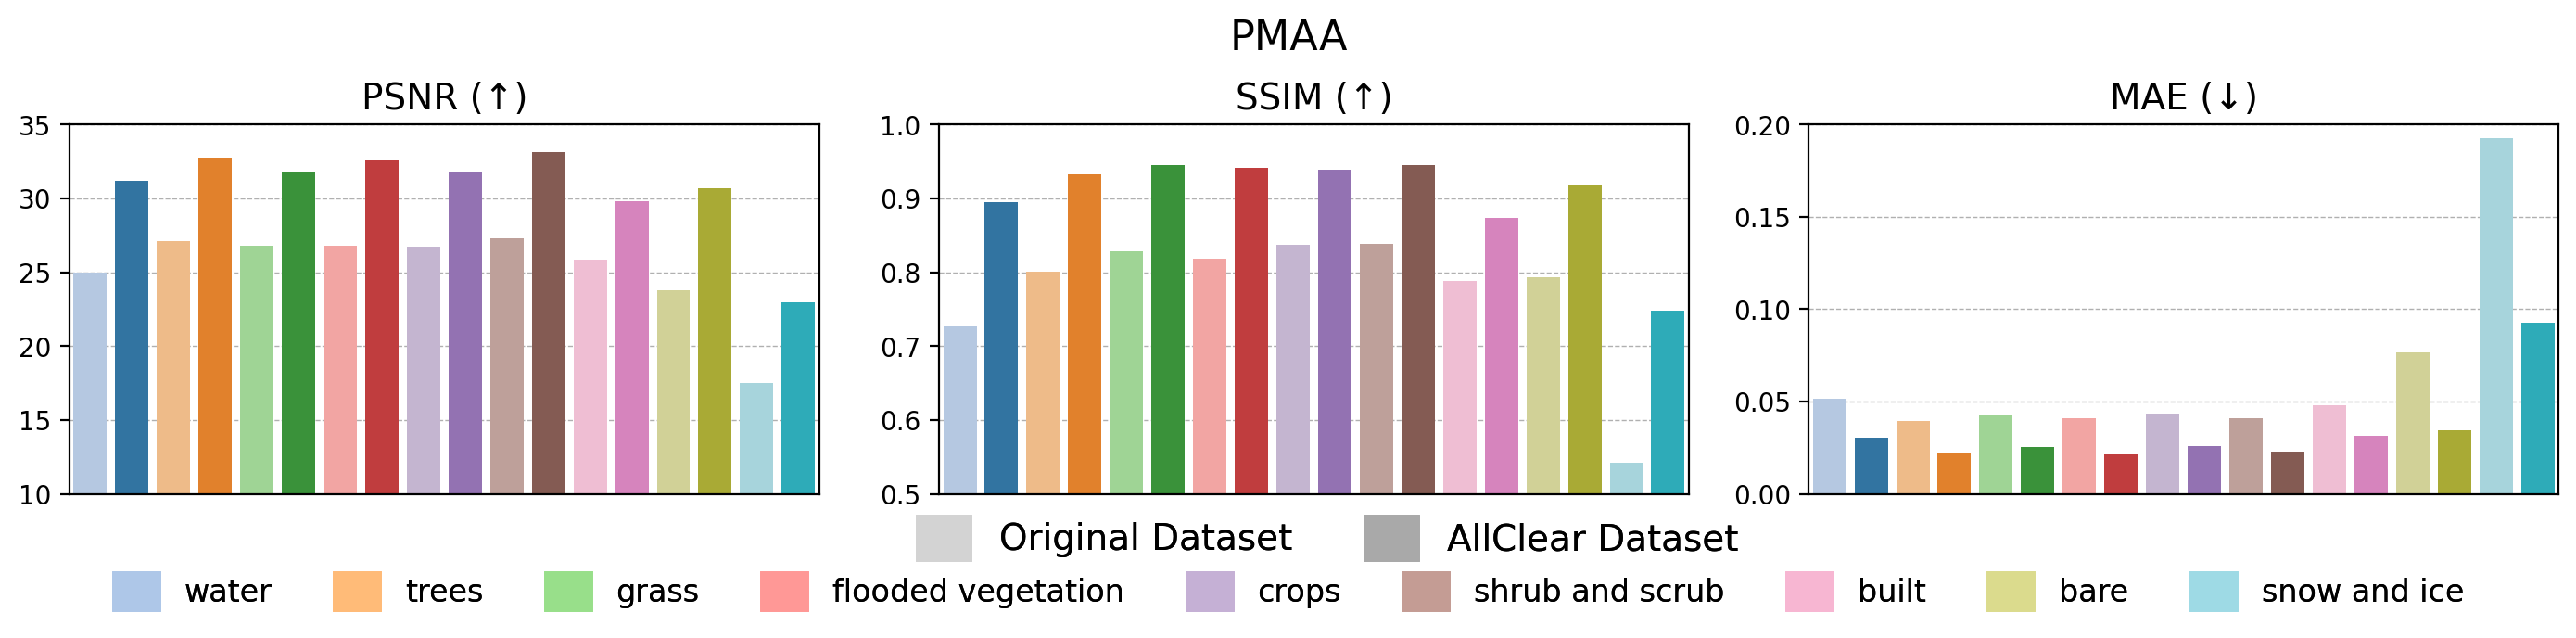

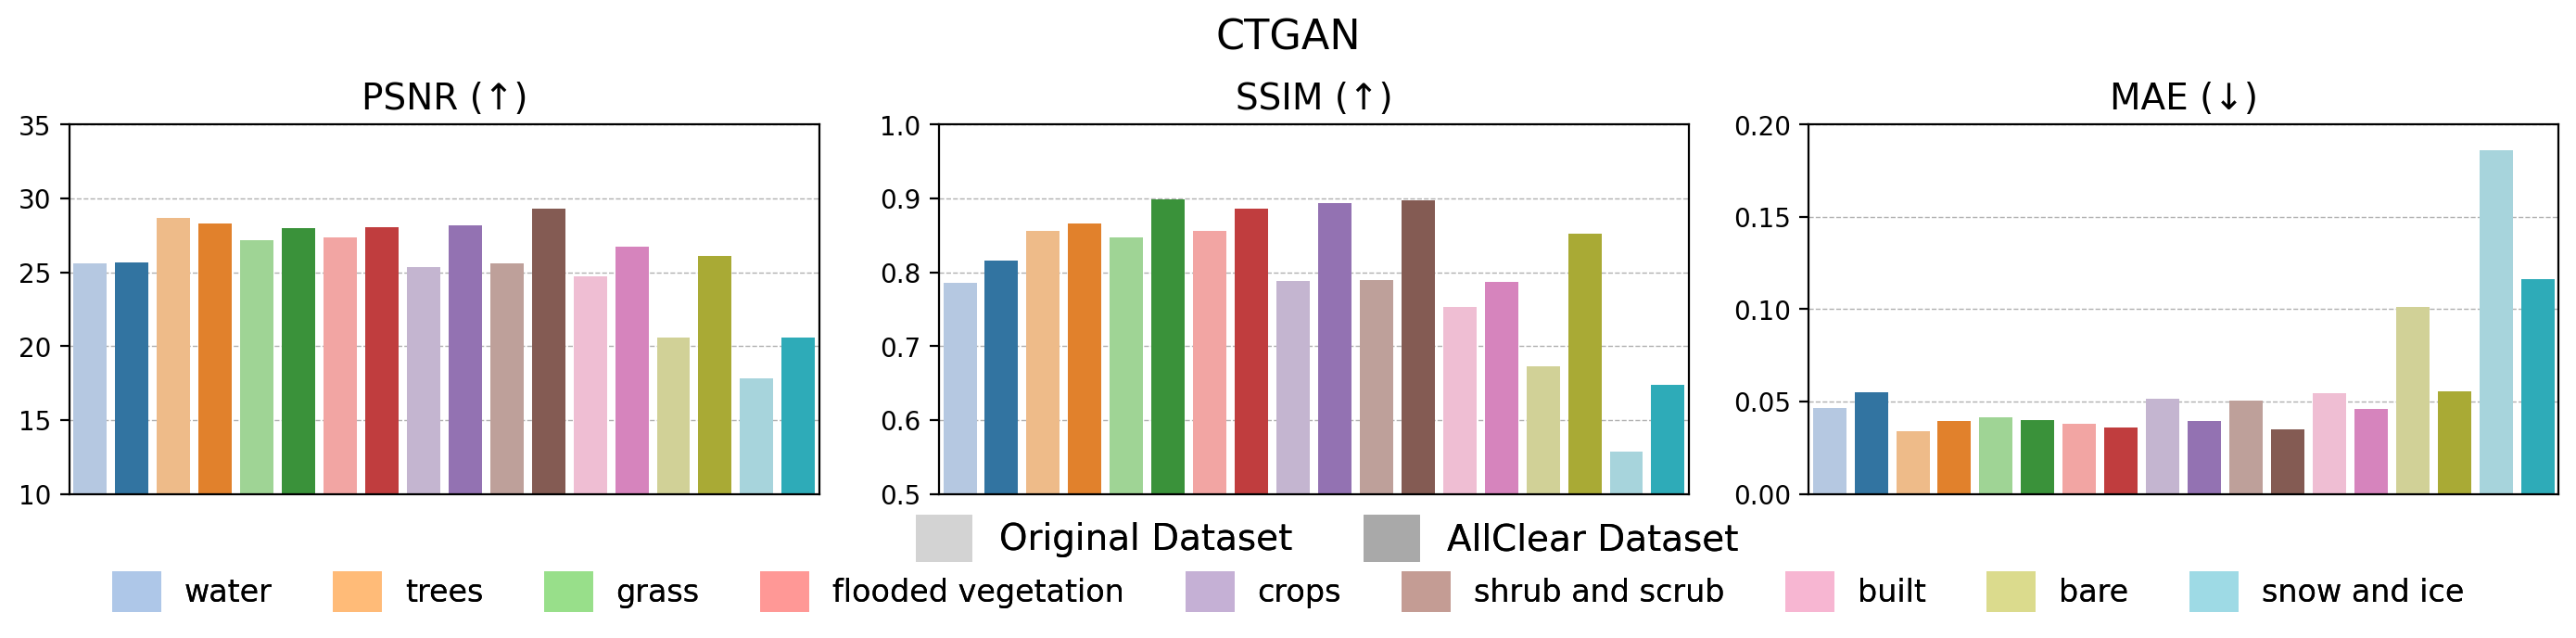

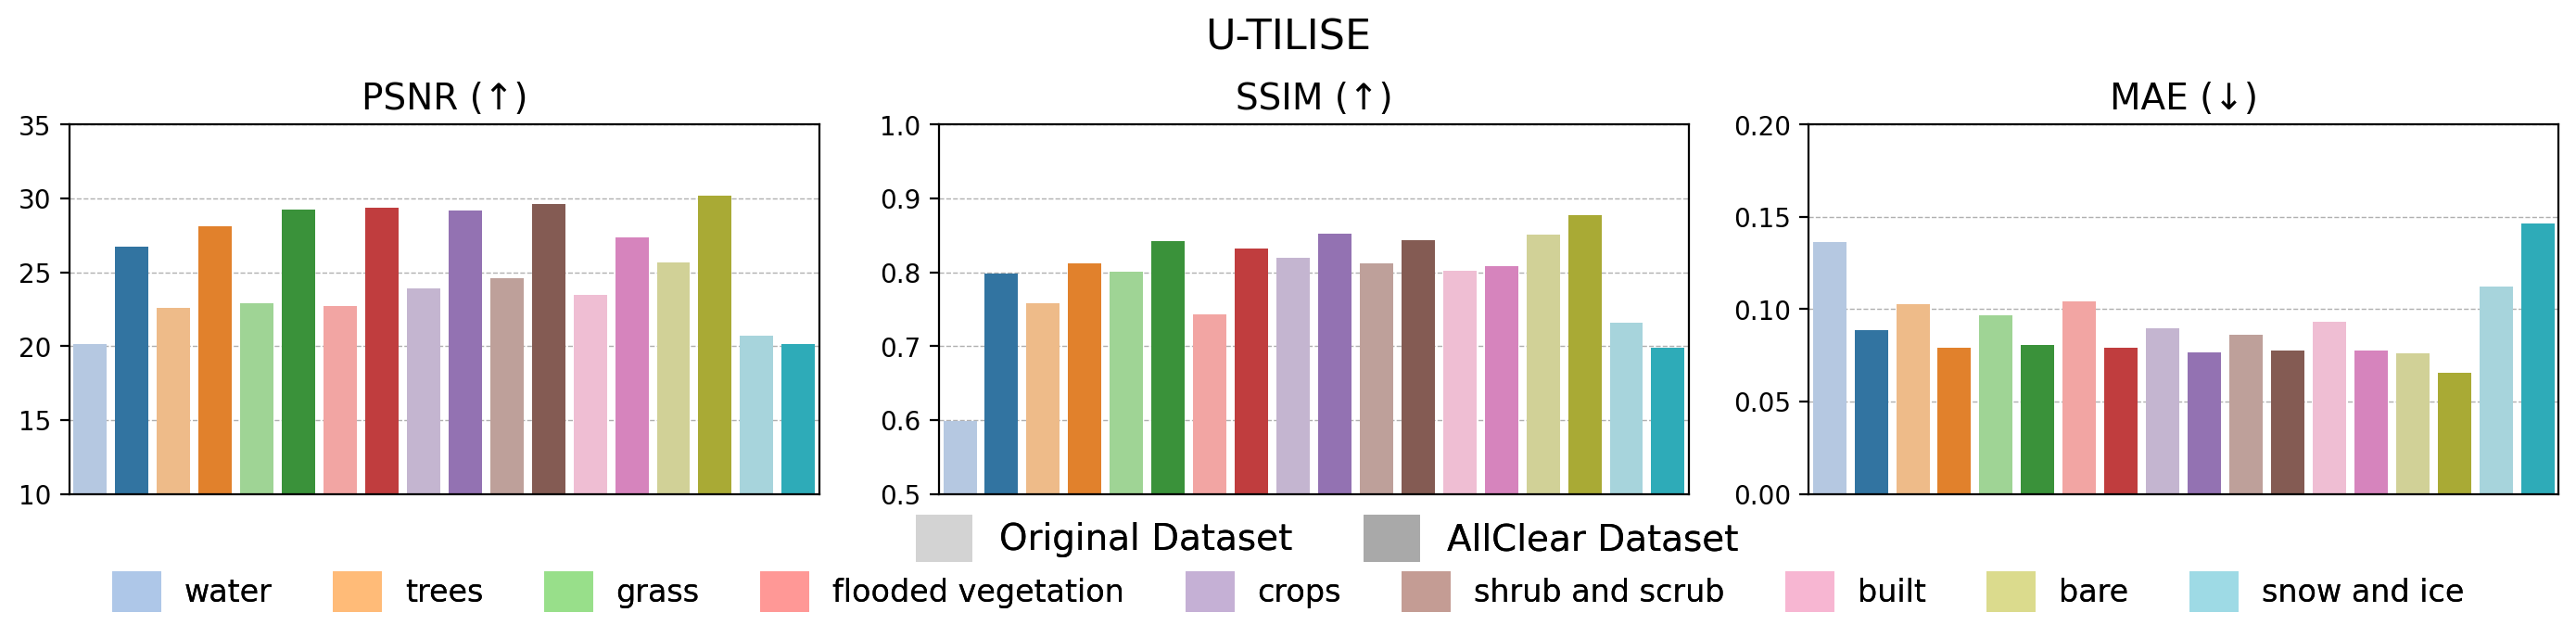

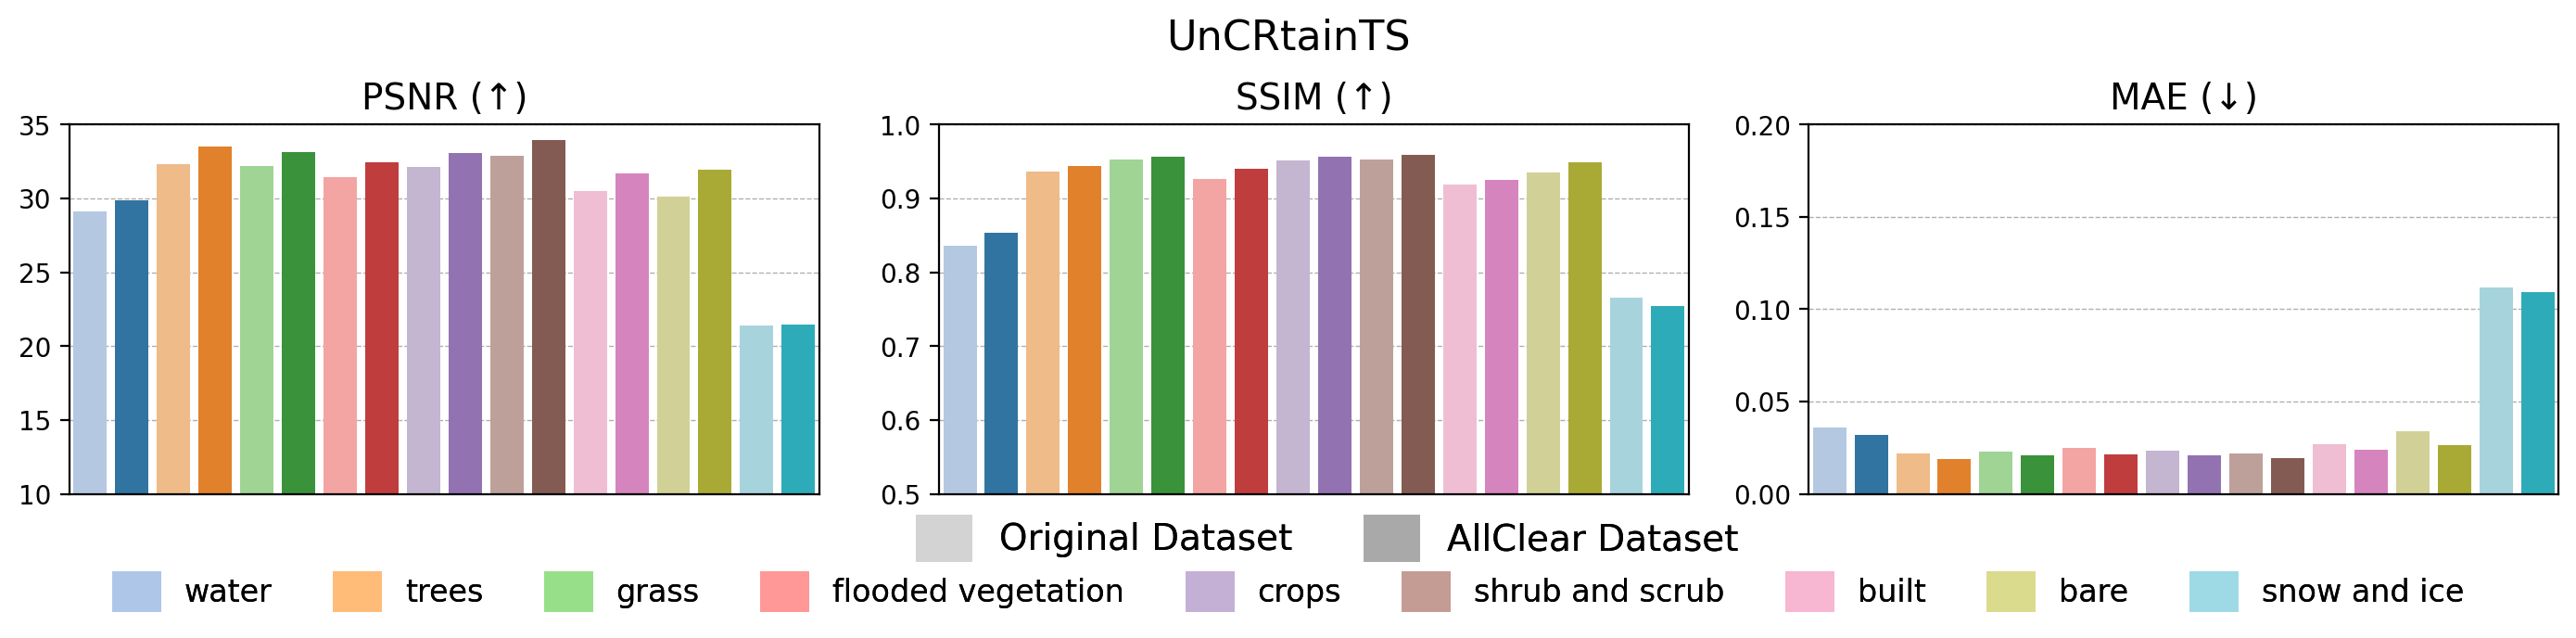

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Assuming df is your DataFrame
# Define the mapping for class labels
class_labels = ['water', 'trees', 'grass', 'flooded vegetation', 'crops', 'shrub and scrub', 'built', 'bare', 'snow and ice']

# Define the models and metrics to plot
models = ['pmaa', 'ctgan', 'utilise', 'uncrtaints']
model_titles = ['PMAA', 'CTGAN', 'U-TILISE', 'UnCRtainTS']
metrics = ['PSNR', 'SSIM', 'MAE']

# Define a colormap
original_palette = sns.color_palette("tab20", 20)
modified_colors = original_palette[:14] + original_palette[16:]
colors = sns.color_palette(modified_colors[:18])

# Function to swap even and odd colors
def swap_even_odd_colors(colors):
    swapped_colors = colors[:]
    for i in range(0, len(colors) - 1, 2):
        swapped_colors[i], swapped_colors[i + 1] = colors[i + 1], colors[i]
    return swapped_colors

# Swap the colors
swapped_colors = swap_even_odd_colors(colors)

# Function to get the label for each bar
def get_label(metric, cls, model, old_or_new):
    cls_label = class_labels[cls]
    if old_or_new == 'old':
        return f"{cls_label} (original)"
    else:
        return f"{cls_label} (allclear)"

# Generate a plot for each model
for model_id, model in enumerate(models):
    fig, axes = plt.subplots(1, 3, figsize=(14, 3.5), dpi=200)
    fig.suptitle(model_titles[model_id], y=0.95, size=16)
    axes = axes.flatten()


    for i, metric in enumerate(metrics):
        bars = []
        labels = []
        palette = []
        for cls in range(9):
            # Old model (wo_s1)
            old_value = df.loc[(df['index'] == model) & (df['type'] != 'allclear'), f'{metric}-{cls}'].values[0]
            bars.append(old_value)
            labels.append(get_label(metric, cls, model, 'old'))
            palette.append(swapped_colors[cls * 2])  # Lighter color for old model

            # New model (allclear_rgb)
            new_value = df.loc[(df['index'] == model) & (df['type'] == 'allclear'), f'{metric}-{cls}'].values[0]
            bars.append(new_value)
            labels.append(get_label(metric, cls, model, 'new'))
            palette.append(swapped_colors[cls * 2 + 1])  # Darker color for new model
        
        sns.barplot(ax=axes[i], x=labels, y=bars, palette=palette, zorder=2)
        
        # Customize title with arrows
        arrow = "↑" if metric in ['PSNR', 'SSIM'] else "↓"
        axes[i].set_title(f"{metric} ({arrow})", fontsize=14)
        
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].set_xticks([])
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

        # Set y-axis limits
        if metric == 'PSNR':
            axes[i].set_ylim(10, 35)
        elif metric == 'SSIM':
            axes[i].set_ylim(0.5, 1)
        elif metric == 'MAE':
            axes[i].set_ylim(0., 0.2)

        axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

    # axes[0].set_ylabel(f"{model}", rotation=0, size=20)

    # First legend to denote the meaning of color and the 9 labels
    handles1 = [mpatches.Patch(color=swapped_colors[i * 2], label=class_labels[i]) for i in range(9)]
    labels1 = [class_labels[i] for i in range(9)]
    legend1 = fig.legend(handles1, labels1, loc='lower center', ncol=9, fontsize=12, frameon=False, handleheight=1.5, handlelength=1.5)
    
    # Second legend to indicate the shallow and darker colors
    handles2 = [
        mpatches.Patch(color='lightgray', label='Original Dataset'),
        mpatches.Patch(color='darkgray', label='AllClear Dataset')
    ]
    labels2 = ['Original Dataset', 'AllClear Dataset']
    legend2 = fig.legend(handles2, labels2, loc=(0.35,0.1), ncol=2, fontsize=14, frameon=False, handleheight=1.5, handlelength=1.5)
    
    # Add legends to the figure
    fig.add_artist(legend1)
    fig.add_artist(legend2)

    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.15, 1, 1])
    # plt.savefig(f"./exp_0531_lulc_{model}.png")
    plt.savefig(f"./exp_0531_lulc_{model}.pdf")
    # plt.show()

    # break

In [61]:
len(swapped_colors)

17

In [57]:
colors = sns.color_palette("tab20", 20)

In [58]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [31]:
model

'utilise'